Hàm này sẽ chuyển đổi các đặc trưng bằng cách scale mỗi đặc trưng sử dụng thống kê, loại bỏ ngoại lai.

Sau khi chuẩn hóa với RobustScaler, chúng ta có thể áp dụng thêm StandardScaler hoặc MinMaxScaler cho quá trình tiền xử lý dữ liệu.

Bộ chuẩn hóa này loại bỏ trung vị và chia tỷ lệ dữ liệu thành các phần tư (mặc định là IQR: Interquartile Range). IQR là phạm vi giữa phần tư thứ nhất (25%) và phần tư thứ ba (75%).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

1. Khởi tạo dữ liệu

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,49.210219,32.706506,8.218611,13.629098,16.992821
1,40.433527,1.818058,9.979859,-7.265943,22.201166
2,58.020701,3.315740,12.242005,-6.269082,18.752190
3,48.321783,25.508752,11.016826,17.784359,22.252153
4,53.132641,2.519490,11.919963,28.091015,17.905834


2. Trực quan hóa dữ liệu sinh ra

<Axes: ylabel='Density'>

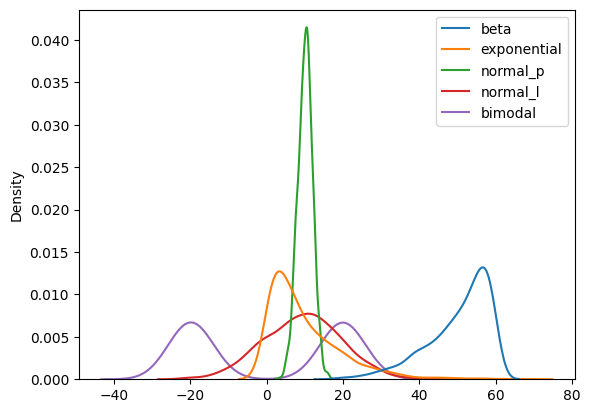

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.311972,9.919971,10.062758,9.381091,0.062529
std,8.213903,9.628983,1.955064,10.209582,20.111504
min,18.646434,0.000082,3.412524,-20.856512,-28.212392
25%,45.923082,2.809068,8.826945,2.525987,-19.984197
50%,52.775332,7.051103,10.114006,9.812611,-0.616907
75%,56.755988,14.142925,11.370185,16.405020,19.916224
max,59.980226,67.561685,16.231837,48.544244,27.490325


3. Thêm một đặc trưng với giá trị lớn hơn nhiều

<Axes: ylabel='Density'>

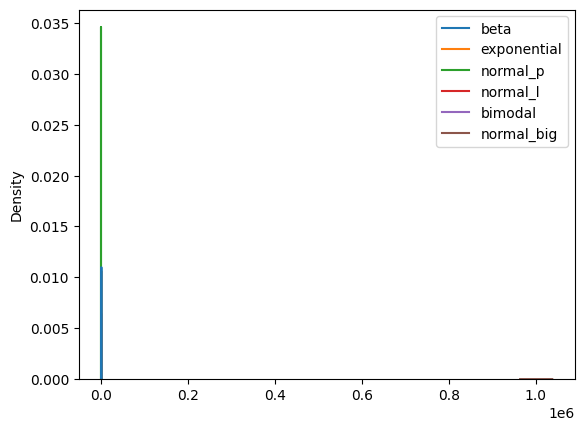

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

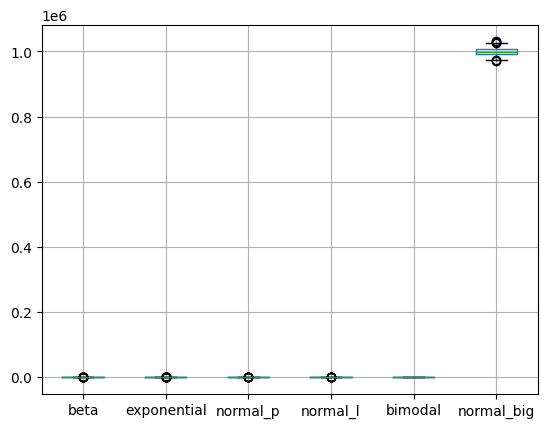

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

4. Chuẩn hóa với Robust Scaling

In [9]:
# Khai báo đối tượng RobustScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.329100,2.263607,-0.745268,0.274982,0.441342,0.355371
1,-1.139288,-0.461718,-0.052747,-1.230529,0.571875,-0.024431
2,0.484207,-0.329576,0.836727,-1.158704,0.485436,-1.038878
3,-0.411113,1.628541,0.354988,0.574373,0.573153,1.097882
4,0.032984,-0.399830,0.710101,1.316980,0.464224,-0.125793


<Axes: ylabel='Density'>

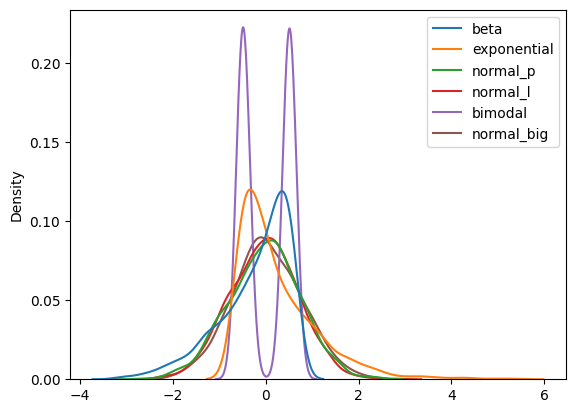

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [15]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,-2.273961e-01,0.253124,-2.015083e-02,-0.031091,0.017028,3.770192e-02
std,7.582363e-01,0.849577,7.687294e-01,0.735612,0.504042,7.484005e-01
min,-3.150484e+00,-0.622120,-2.635017e+00,-2.209745,-0.691609,-2.119944e+00
25%,-6.325403e-01,-0.374280,-5.060714e-01,-0.525009,-0.485391,-4.547054e-01
50%,-3.279712e-16,0.000000,3.492215e-16,0.000000,0.000000,-4.483312e-15
75%,3.674597e-01,0.625720,4.939286e-01,0.474991,0.514609,5.452946e-01
max,6.650934e-01,5.338922,2.405526e+00,2.790658,0.704434,2.447705e+00


<Axes: >

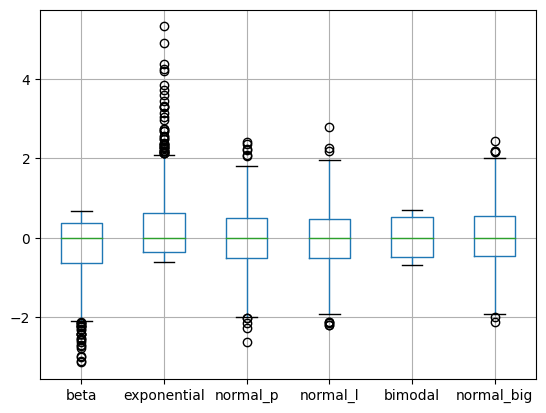

In [16]:
df_s.boxplot()

In [17]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.1504841448966765,
 -0.6221201697901318,
 -2.6350170325451683,
 -2.2097449560985636,
 -0.691608884769248,
 -2.119944471343439]

In [18]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6650933738111582,
 5.338922297562525,
 2.405526049447358,
 2.7906579377827847,
 0.7044344887523903,
 2.4477053362139993]

In [19]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.27753324e+01,  7.05110332e+00,  1.01140062e+01,  9.81261070e+00,
       -6.16907148e-01,  9.99298237e+05])

Mặc dù phạm vi giá trị cho mỗi đặc trưng nhỏ hơn nhiều so với các đặc trưng gốc, nhưng nó lớn hơn và thay đổi nhiều hơn so với MinMaxScaler. Các giá trị phân phối bimodal hiện được nén thành hai nhóm nhỏ.